# Find optimal threshold for Binary Classification using ROC curve 

In [144]:
# import required library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [146]:
# import make_classification to help on generating a dataset for classfication problem 
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=2000,n_classes=2, weights=[1,1], random_state=1)
x.shape # 2000 records, 20 features (by default), 2 output labels, and balanced dataset by same weight

(2000, 20)

In [148]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [150]:
# train, test split 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

### Random Forest 

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
ytrain_pred = rf_model.predict_proba(x_train)
ytrain_pred # the probabilities of the target being class 0 and class 1

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.28, 0.72]])

In [154]:
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
#Since class 1 is typically considered the event of interest, we use the probabilities that 
#the samples belong to class 1 to compute the ROC-AUC score.
ytest_pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9835055555555555


### Logistic Regression 

In [158]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
ytrain_pred = log_model.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
ytest_pred = log_model.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier 

In [161]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm='SAMME')
ada_model.fit(x_train,y_train)
ytrain_pred = ada_model.predict_proba(x_train)
print('AdaBoost train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
ytest_pred = ada_model.predict_proba(x_test)
print('AdaBoost test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

AdaBoost train roc-auc: 0.9926743552432595
AdaBoost test roc-auc: 0.9794888888888889


### KNN Classifier 

In [164]:
from sklearn.neighbors import KNeighborsClassifier 
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
ytrain_pred = knn_model.predict_proba(x_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
ytest_pred = knn_model.predict_proba(x_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


## Now we will focus on slecting the best threshold for maximum accuracy 

In [167]:
pred = []
for model in [rf_model,log_model,ada_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,-1]))
final_pred = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.9850777777777778


In [169]:
pd.concat(pred,axis=1) #concat each model result into columns using axis=1

,0,1,2,3
0,0.97,0.991873,0.669528,1.0
1,0.00,0.000008,0.316455,0.0
2,0.94,0.966763,0.632138,0.8
3,0.97,0.761896,0.533171,0.8
4,0.66,0.779209,0.440650,0.4
...,...,...,...,...
595,0.00,0.024263,0.321128,0.0
596,0.03,0.000003,0.262749,0.0
597,1.00,0.984400,0.605074,1.0
598,0.02,0.001157,0.266081,0.2


In [171]:
final_pred #mean of 4 models 

0      0.907850
1      0.079116
2      0.834725
3      0.766267
4      0.569965
         ...   
595    0.086348
596    0.073188
597    0.897368
598    0.121810
599    0.859932
Length: 600, dtype: float64

In [173]:
fpr,tpr,threshold = roc_curve(y_test,final_pred)
threshold

array([       inf, 0.92939995, 0.91858752, 0.91585577, 0.81770291,
       0.81711355, 0.81537679, 0.81408135, 0.81225984, 0.80991304,
       0.77424044, 0.77337021, 0.74983274, 0.74859565, 0.7402222 ,
       0.73945217, 0.68408259, 0.68247295, 0.62737874, 0.61133457,
       0.58635299, 0.58050184, 0.57996618, 0.57617231, 0.56570879,
       0.56149768, 0.55956678, 0.55095293, 0.53909348, 0.53848082,
       0.51080504, 0.47369513, 0.4502096 , 0.44144019, 0.43098027,
       0.36581505, 0.33998471, 0.22029037, 0.21865762, 0.21148005,
       0.20968852, 0.18418332, 0.18159164, 0.0889541 , 0.08877288,
       0.05652849])

In [181]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
# for each threshold, run through final_pred, make classification, and calculate the accuracy
for thres in threshold:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls = pd.concat([pd.Series(threshold), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,threshold,accuracy
33,0.441440,0.961667
34,0.430980,0.960000
32,0.450210,0.960000
31,0.473695,0.958333
30,0.510805,0.956667


### Then select the first threshold as the optimal threshold 

In [186]:
# Can also see this through the ROC curve 
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = 'red', label = 'ROC')
    plt.plot([0,1],[0,1],color = 'black',linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve (ROC)')
    plt.legend()
    plt.show()

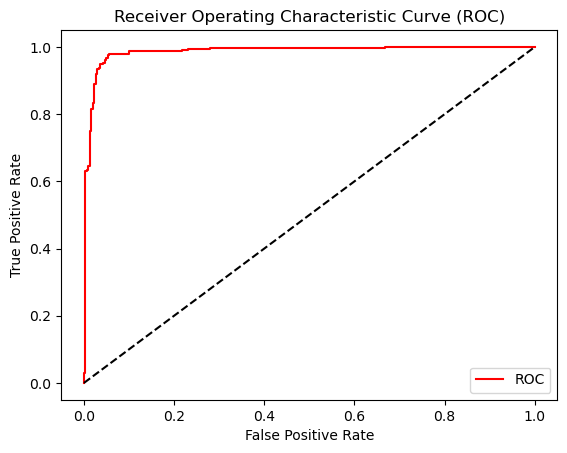

In [188]:
plot_roc_curve(fpr,tpr)